In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# loading the dataset

In [2]:
ds = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding='latin1')

In [3]:
ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### here we can observe that the columns 3,4,5 are almost empty so we do not need them hence we will drop them

In [5]:
ds = ds.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [6]:
ds.columns

Index(['v1', 'v2'], dtype='object')

### for spam classification our target column is the first column named v1 we need to encode the values since they are categorical for that we will use label encoder

# encoding values

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # creating an object for label encoder

In [8]:
ds['v1'] = le.fit_transform(ds['v1'])

In [9]:
ds.v1.value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

# checking for duplicates

In [10]:
ds.duplicated().sum()

403

In [11]:
ds =ds.drop_duplicates()

In [12]:
ds.shape

(5169, 2)

In [13]:
ham = ds[ds['v1']==0].sample(653)

In [14]:
ham.head()

,v1,v2
3544,0,Thank You meet you monday
2270,0,U know we watchin at lido?
2040,0,You always make things bigger than they are
819,0,\BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GET...
1542,0,Now press conference da:)


In [15]:
spam = ds[ds['v1']==1]

In [16]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 2 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      653 non-null    int64 
 1   v2      653 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.3+ KB


In [17]:
ds2 = pd.concat([ham,spam],axis=0)

In [18]:
ds2.head()

,v1,v2
3544,0,Thank You meet you monday
2270,0,U know we watchin at lido?
2040,0,You always make things bigger than they are
819,0,\BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GET...
1542,0,Now press conference da:)


In [19]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 3544 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      1306 non-null   int64 
 1   v2      1306 non-null   object
dtypes: int64(1), object(1)
memory usage: 30.6+ KB


In [20]:
ds2.duplicated().sum(), ds2.isnull().sum()

(0,
 v1    0
 v2    0
 dtype: int64)

# visualization

In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## seperating data into ham and spam

In [23]:
hamt = ds2[ds2['v1']==1]
spamt = ds2[ds2['v1']==0]

In [24]:
hamt.head()

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [25]:
ham_txt = " ".join(hamt['v2'])
len(ham_txt)

90695

## word cloud for ham sms

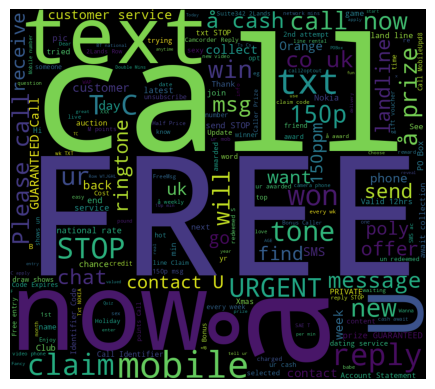

In [26]:
wc = WordCloud(width=900,height=800).generate(ham_txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [27]:
spamt.head()

,v1,v2
3544,0,Thank You meet you monday
2270,0,U know we watchin at lido?
2040,0,You always make things bigger than they are
819,0,\BOO BABE! U ENJOYIN YOURJOB? U SEEMED 2 B GET...
1542,0,Now press conference da:)


In [28]:
spam_txt = " ".join(spamt['v2'])
len(spam_txt)

45707

## word cloud for spam sms

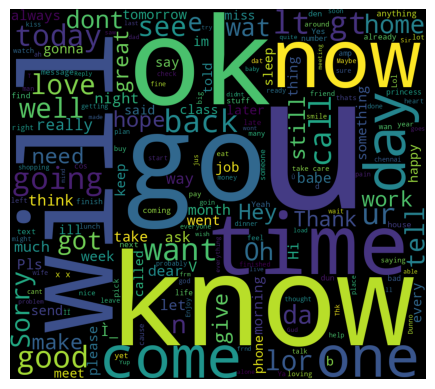

In [29]:
wc1 = WordCloud(width = 900,height = 800).generate(spam_txt)
plt.imshow(wc1)
plt.axis('off')
plt.show()

# model creation

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(ds2['v2'],ds2['v1'],test_size=0.2,random_state=42,stratify=ds2['v1'])

In [31]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((1044,), (1044,), (262,), (262,))

In [32]:
import spacy

In [33]:
nlp = spacy.load("en_core_web_sm")

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

## nlp pipeline

### this pipeline will do test preprocessing that includes tokenization,vectorization,lemmatization,stop word removal , vocabulary creation and model generation

In [35]:
model = Pipeline([
    ('text preprocessing',TfidfVectorizer(
    tokenizer = lambda txt:[token.lemma_ for token in nlp(txt)],
    stop_words = 'english',
    ngram_range = (1,2),
    max_features = 500)),
    ('text classifier',RandomForestClassifier())
])

In [36]:
model.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'ca', 'far', 'make', 'nt', 'whereaft'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('text preprocessing',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 stop_words='english',
                                 tokenizer=<function <lambda> at 0x7df42ef00f70>)),
                ('text classifier', RandomForestClassifier())])

# model prediction

In [37]:
ypred = model.predict(xtest)

In [38]:
ypred[:5]

array([0, 1, 1, 0, 0])

## classification report

In [39]:
from sklearn.metrics import classification_report as cr
print(cr(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       131
           1       0.98      0.93      0.96       131

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262



# testing 

### here we are checking our model through a sample input

In [40]:
sample_txt = 'hurray !! you won a 25 million dollors'

### this sample sms is a spam message as we can see , so it should be classified as 1 by our model , let's see what happens

In [41]:
model = Pipeline([
    ('text preprocessing',TfidfVectorizer(
    tokenizer = lambda txt:[token.lemma_ for token in nlp(sample_txt)],
    stop_words = 'english',
    ngram_range = (1,2),
    max_features = 500)),
    ('text classifier',RandomForestClassifier())
])

In [42]:
model.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['!', '25', 'dollor', 'hurray', 'million', 'win'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('text preprocessing',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 stop_words='english',
                                 tokenizer=<function <lambda> at 0x7df42ef00ee0>)),
                ('text classifier', RandomForestClassifier())])

In [43]:
ypred = model.predict([sample_txt])

In [44]:
print(ypred[0])

0


## As we can see it has correctly classified the sample text as spam i.e. prediction = 1 so the model is working good